In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))


# Hypothesis Testing

## Motivation:

#### In social science, business, and many other domains, we often want to compare two groups of things, but we cannot observe the entire populations and must rely on samples.

####  Because samples vary, it's not immediately obvious whether an observed difference is due to chance alone (sampling variation) or due to an underlying difference between populations. 

#### However, we can exploit the fact that samples vary in a predictable way (due to the Central Limit Theoreom) in order to make comparisons and quantify the uncertainty of those comparisons.

## Infomal Steps of a Hypothesis Test

1. We make some hypothesis about the world (often in the form "Group A is different from Group B.")

2. Then we make another hypothesis  (the null hypothesis) that is the opposite of our original hypothesis. (Often in the form: "There is no significant difference between Group A and Group B.")

3. Then we ask the question: Assuming the Null Hypothesis is true, what is the probability that we drew the sample(s)? (Or... Given that there is no significant difference Group A and Group B, what is the chance that we observed the difference that we observed between the samples of the groups?)

## Formal Steps of a Hypothesis Test

1. State Null Hypothesis
2. State Alternative Hypothesis
3. Set Alpha
4. Collect Data
5. Calculate Test Statistic
6. Construct Rejection Regions
7. Draw conclusion

## Questions to Answer about which statistical test to use:
- One-sample or two-sample test?
- If it's a two-sample test, are the samples paired or independent?
- A two-tailed or one-tailed test?
- A z-test or a t-test?

## Pop quiz: What is alpha?

<span style="color:white"> 
With respect to hypothesis tests, alpha refers to significance level, the probability of making a Type I error, i.e., rejecting the null hypothesis when it is true.  
</span>

## Pop quiz: What is p?

<span style="color:white"> 
p is the probability of drawing the sample(s) you drew, or one(s) more extreme, by chance alone, given that the null hypothesis is true.
</span>

# Demo

## Independent sample T-tests with plots

In [16]:
import numpy as np
import pandas as pd
import scipy.stats as stats

import matplotlib.pyplot as plt
%matplotlib inline

import plotly.plotly as py
import plotly.graph_objs as go
from plotly import figure_factory as ff

#### Generate Data
Let us generate some random data from the `Normal Distriubtion`. We will sample 50 points from a normal distribution with mean $\mu = 0$ and variance $\sigma^2 = 1$ and from another with mean $\mu = 2$ and variance $\sigma^2 = 1$.

In [17]:
data1 = np.random.normal(0, 1, size=50)
data2 = np.random.normal(2, 1, size=50)

#### Plot the distributions from which samples were drawn

In [18]:
x = np.linspace(-4, 6, 160)
y1 = stats.norm.pdf(x)
y2 = stats.norm.pdf(x, loc=2)

trace1 = go.Scatter(
    x = x,
    y = y1,
    mode = 'lines+markers',
    name='Mean of 0'
)

trace2 = go.Scatter(
    x = x,
    y = y2,
    mode = 'lines+markers',
    name='Mean of 2'
)

data = [trace1, trace2]

py.iplot(data, filename='normal-dists-plot')

#### Plot Sample Histograms

In [19]:
trace1 = go.Histogram(
    x=data1,
    opacity=0.75
)
trace2 = go.Histogram(
    x=data2,
    opacity=0.75
)

data = [trace1, trace2]
layout = go.Layout(barmode='overlay')
fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='overlaid histogram')

#### Plot sample histograms using matplotlib, with mean and kde curve shown

/Users/jameshelfrich/miniconda3/envs/my_env/lib/python3.7/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning:


The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.

/Users/jameshelfrich/miniconda3/envs/my_env/lib/python3.7/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning:


The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.



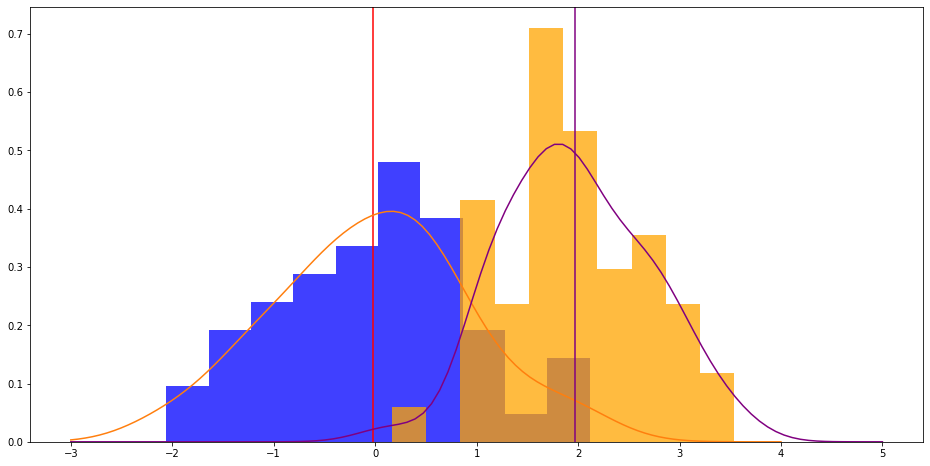

In [20]:
kde_data1 = stats.gaussian_kde(data1)
kde_data2 = stats.gaussian_kde(data2)
plt.figure(figsize=(16,8))
l = plt.hist(data1, bins=10, normed=True, facecolor='blue', alpha=0.75)
l_mean = plt.axvline(data1.mean(), color="red")
l_dist = plt.plot(np.linspace(-3,4, 100), kde_data1(np.linspace(-3,4, 100)))
m = plt.hist(data2, bins=10, normed=True, facecolor='orange', alpha=0.75)
m_mean = plt.axvline(data2.mean(), color="purple")
m_dist = plt.plot(np.linspace(-3,5, 100), kde_data2(np.linspace(-3,5, 100)), color="purple")

### Perform Hypothesis Test

A `One Sample T-Test` is a statistical test used to evaluate the null hypothesis that the mean $m$ of a 1D sample dataset of independant observations is equal to the true mean $\mu$ of the population from which the data is sampled. In other words, our null hypothesis is that

$$
\begin{align*}
m = \mu
\end{align*}
$$

For our T-test, we will be using a significance level of `0.05`. On the matter of doing ethical science, it is good practice to always state the chosen significance level for a given test _before_ actually conducting the test. This is meant to ensure that the analyst does not modify the significance level for the purpose of achieving a desired outcome.

In [21]:
true_mu = 0
data1_results = stats.ttest_1samp(data1, true_mu)
data1_results

Ttest_1sampResult(statistic=-0.18784132576436116, pvalue=0.8517767642447496)

Since our p-value is larger than our pre-specified significance level, we must fail to reject the null-hypothesis. This is our expected result because the data was collected from a normal distribution with the same population mean for which we performed the test.

In [22]:
true_mu = 0
data2_results = stats.ttest_1samp(data2, true_mu)
data2_results

Ttest_1sampResult(statistic=19.705795850287284, pvalue=6.160590317407463e-25)

Since our p-value is infinitesimally small (i.e., much smaller than alpha = 0.05), we have good evidence to reject the null-hypothesis. This is our expected result because the data was collected from a normal distribution with a different population mean.

### Reimplimenting one-sample t-test

In [23]:
sample_1 = [4.15848606,  3.86146363,  4.31545726,  3.3748772,
            4.67023082, 4.45950272,  3.85894915,  4.41089417,
            3.82360986,  3.79889443, 4.75884172,  3.27100914,
            4.08939402,  4.08904694,  5.62589842, 3.71445656,
            3.58463792,  4.42426443,  3.9671448 ,  4.39339124]

sample_2 = [10.81261135, 9.68035252, 9.87293556,  10.06308861,
            9.57381722, 10.00922156, 10.90522431, 9.70843104,
            10.16614481, 10.09447189, 10.51260742, 10.17503686,
            10.38718472, 10.52334431, 9.55808306, 10.24290938,
            10.6048062 , 10.27535938, 9.6329808 ,  9.67338239]

In [24]:
 def one_sample_ttest(sample, mu):
    """INPUT:
    - sample(LIST) [Values in the sample]
    - mu(FLOAT) [The hypothesized mean value of the population]

    OUTPUT:
    - results(TUPLE) [Tuple containing t-statistic(FLOAT) and p-value(FLOAT)]
    """
    t_score = (np.mean(sample) - mu) /(np.std(sample, ddof = 1)/len(sample)**.5)
    p_val = stats.t.sf(np.abs(t_score), len(sample) - 1) *2
    return (t_score, p_val)

scipy.stats.t = <scipy.stats._continuous_distns.t_gen object at 0x2b45d30112d0>
A Student’s T continuous random variable.

Method: 
.sf(x, df, loc=0, scale=1)	
Survival function (1-cdf — sometimes more accurate than doing it manually with .cdf() method). 

In [25]:
np.mean(sample_1)

4.1325225245

In [26]:
one_sample_ttest(sample_1, 4)

(1.1055037201766031, 0.28274392706212076)

In [27]:
stats.ttest_1samp(sample_1, 4)

Ttest_1sampResult(statistic=1.105503720176603, pvalue=0.2827439270621211)

### Two-sample t-test

In [28]:
twosample_results = stats.ttest_ind(data1, data2)
twosample_results

Ttest_indResult(statistic=-11.921367436367834, pvalue=8.817353306025935e-21)

Since our p-value is much less than our significance level, then we can confidently reject our null hypothesis of identical means. This is in alignment with our setup, since we sampled from two different normal pdfs with different means.

## TODO:
* Add examples for different types of t-tests
* experiment more with plotly

## Another Example 

Definitions:
A quarter is a specific three month period, Q1 is January through March, Q2 is April through June, Q3 is July through September, Q4 is October through December.
A recession is defined as starting with two consecutive quarters of GDP decline, and ending with two consecutive quarters of GDP growth.
A recession bottom is the quarter within a recession which had the lowest GDP.
A university town is a city which has a high percentage of university students compared to the total population of the city.
Hypothesis: University towns have their mean housing prices less effected by recessions. Run a t-test to compare the ratio of the mean price of houses in university towns the quarter before the recession starts compared to the recession bottom. (price_ratio=quarter_before_recession/recession_bottom)

Data:
From the Zillow research data site there is housing data for the United States. In particular the datafile for all homes at a city level, City_Zhvi_AllHomes.csv, has median home sale prices at a fine grained level.
From the Wikipedia page on college towns is a list of university towns in the United States which has been copy and pasted into the file university_towns.txt.
From Bureau of Economic Analysis, US Department of Commerce, the GDP over time of the United States in current dollars (use the chained value in 2009 dollars), in quarterly intervals, in the file gdplev.xls. For this assignment, only look at GDP data from the first quarter of 2000 onward.
Each function in this assignment below is worth 10%, with the exception of run_ttest(), which is worth 50%.

In [1]:
# Use this dictionary to map state names to two letter acronyms
states = {'OH': 'Ohio', 'KY': 'Kentucky', 'AS': 'American Samoa', 'NV': 'Nevada', 'WY': 'Wyoming', 'NA': 'National', 'AL': 'Alabama', 'MD': 'Maryland', 'AK': 'Alaska', 'UT': 'Utah', 'OR': 'Oregon', 'MT': 'Montana', 'IL': 'Illinois', 'TN': 'Tennessee', 'DC': 'District of Columbia', 'VT': 'Vermont', 'ID': 'Idaho', 'AR': 'Arkansas', 'ME': 'Maine', 'WA': 'Washington', 'HI': 'Hawaii', 'WI': 'Wisconsin', 'MI': 'Michigan', 'IN': 'Indiana', 'NJ': 'New Jersey', 'AZ': 'Arizona', 'GU': 'Guam', 'MS': 'Mississippi', 'PR': 'Puerto Rico', 'NC': 'North Carolina', 'TX': 'Texas', 'SD': 'South Dakota', 'MP': 'Northern Mariana Islands', 'IA': 'Iowa', 'MO': 'Missouri', 'CT': 'Connecticut', 'WV': 'West Virginia', 'SC': 'South Carolina', 'LA': 'Louisiana', 'KS': 'Kansas', 'NY': 'New York', 'NE': 'Nebraska', 'OK': 'Oklahoma', 'FL': 'Florida', 'CA': 'California', 'CO': 'Colorado', 'PA': 'Pennsylvania', 'DE': 'Delaware', 'NM': 'New Mexico', 'RI': 'Rhode Island', 'MN': 'Minnesota', 'VI': 'Virgin Islands', 'NH': 'New Hampshire', 'MA': 'Massachusetts', 'GA': 'Georgia', 'ND': 'North Dakota', 'VA': 'Virginia'}

def get_list_of_university_towns():
    '''Returns a DataFrame of towns and the states they are in from the 
    university_towns.txt list. The format of the DataFrame should be:
    DataFrame( [ ["Michigan", "Ann Arbor"], ["Michigan", "Yipsilanti"] ], 
    columns=["State", "RegionName"]  )
    
    The following cleaning needs to be done:

    1. For "State", removing characters from "[" to the end.
    2. For "RegionName", when applicable, removing every character from " (" to the end.
    3. Depending on how you read the data, you may need to remove newline character '\n'. '''
    
    return "ANSWER"

def get_recession_start():
    '''Returns the year and quarter of the recession start time as a 
    string value in a format such as 2005q3'''
    
    return "ANSWER"

def get_recession_end():
    '''Returns the year and quarter of the recession end time as a 
    string value in a format such as 2005q3'''
       
    return "ANSWER"

def get_recession_bottom():
    '''Returns the year and quarter of the recession bottom time as a 
    string value in a format such as 2005q3'''
    
    return "ANSWER"

def convert_housing_data_to_quarters():
    '''Converts the housing data to quarters and returns it as mean 
    values in a dataframe. This dataframe should be a dataframe with
    columns for 2000q1 through 2016q3, and should have a multi-index
    in the shape of ["State","RegionName"].
    
    Note: Quarters are defined in the assignment description, they are
    not arbitrary three month periods.
    
    The resulting dataframe should have 67 columns, and 10,730 rows.
    '''
    
    return "ANSWER"

def run_ttest():
    '''First creates new data showing the decline or growth of housing prices
    between the recession start and the recession bottom. Then runs a ttest
    comparing the university town values to the non-university towns values, 
    return whether the alternative hypothesis (that the two groups are the same)
    is true or not as well as the p-value of the confidence. 
    
    Return the tuple (different, p, better) where different=True if the t-test is
    True at a p<0.01 (we reject the null hypothesis), or different=False if 
    otherwise (we cannot reject the null hypothesis). The variable p should
    be equal to the exact p value returned from scipy.stats.ttest_ind(). The
    value for better should be either "university town" or "non-university town"
    depending on which has a lower mean price ratio (which is equivilent to a
    reduced market loss).'''
    
    return "ANSWER"